169009152/169001437 [==============================] - 4s 0us/step
Epoch 1/100
1563/1563 [==============================] - 53s 34ms/step - loss: 3.9116 - accuracy: 0.1125 - precision: 0.4966 - recall: 0.0118 - val_loss: 3.4824 - val_accuracy: 0.1694 - val_precision: 0.5386 - val_recall: 0.0230
Epoch 2/100
1563/1563 [==============================] - 52s 33ms/step - loss: 3.1774 - accuracy: 0.2246 - precision: 0.6015 - recall: 0.0578 - val_loss: 2.9068 - val_accuracy: 0.2777 - val_precision: 0.6387 - val_recall: 0.1027
Epoch 3/100
1563/1563 [==============================] - 52s 33ms/step - loss: 2.6714 - accuracy: 0.3208 - precision: 0.6657 - recall: 0.1324 - val_loss: 2.5899 - val_accuracy: 0.3430 - val_precision: 0.6862 - val_recall: 0.1677
Epoch 4/100
1563/1563 [==============================] - 52s 33ms/step - loss: 2.2349 - accuracy: 0.4107 - precision: 0.7183 - recall: 0.2236 - val_loss: 2.2989 - val_accuracy: 0.3992 - val_precision: 0.6895 - val_recall: 0.2483
Epoch 5/100
1563/

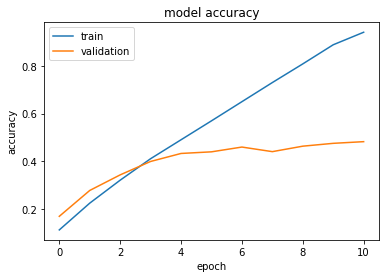

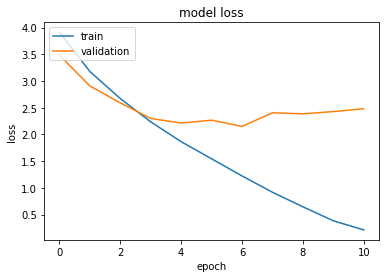

In [1]:
import tensorflow as tf
from keras.datasets import cifar100
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, BatchNormalization,Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.metrics import Precision,Recall
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers

(x_train,y_train),(x_test,y_test)=cifar100.load_data()


es= EarlyStopping(monitor='val_loss', patience=4)
mc= ModelCheckpoint(filepath='VGG16_SGD_BatchNorm.h5', monitor='val_loss', save_best_only=True)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

mean = x_train.mean()
std= x_train.std()
x_train=(x_train-mean)/std

mean = x_test.mean()
std= x_test.std()
x_test=(x_test-mean)/std

model = Sequential()
x_shape=[32,32,3]

model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(100))
model.add(Activation('softmax'))

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])
history=model.fit(x=x_train,y=y_train,epochs=100, validation_data=(x_test,y_test), callbacks=[es,mc])

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [2]:
import keras 

(x_train,y_train),(x_test,y_test)=cifar100.load_data()
y_test=to_categorical(y_test)

mean = x_test.mean()
std= x_test.std()
x_test=(x_test-mean)/std


best_model= keras.models.load_model('VGG16_SGD_BatchNorm.h5')
_, acc,precision,recall = best_model.evaluate(x_test, y_test)

print("Accuracy: "+str(acc*100)+"%")
print("Precision: "+str(precision*100)+"%")
print("Recall: "+str(recall*100)+"%")

313/313 [==============================] - 3s 10ms/step - loss: 2.1491 - accuracy: 0.4595 - precision: 0.6452 - recall: 0.3626
Accuracy: 45.95000147819519%
Precision: 64.5195722579956%
Recall: 36.25999987125397%
